<a href="https://colab.research.google.com/github/WuIlxy/AIJobMatcher/blob/main/VLM_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Language Models Tutorial🚀


Now is your turn to play with vision language models.

<img src='https://drive.google.com/uc?id=1tesvNmFYgebftqPhE4Sx8zV5eHD8_PO1' width=100px>

**What's Inside?** 🧳
* [CLIP](https://arxiv.org/pdf/2103.00020.pdf): A quick tour of CLIP (Contrastive Language–Image Pre-training), where we'll learn how to use this model to link images with text descriptions. 🖼️💬
* [LLaVA](https://llava-vl.github.io/): Next stop is LLaVA, a Large Multimodal Language Model that generates text given an image, opening up new avenues for interactive multimodal chatbots.🤖💬

**Hands-On Fun** 🛠️

We'll be using the 🤗[`transformers`](https://huggingface.co/docs/transformers/en/index) library for interacting with these models. With it, you can wield the power of CLIP and LLaVA with just a few lines of code. Don't worry if you're new to this; we'll go step-by-step!




## **Environment Setup** 🛠️

In [ ]:
!python -m pip install -q datasets transformers ipyplot==1.1.0 ftfy gradio==3.47.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.

## **Contrastive Architecture: [CLIP](https://arxiv.org/pdf/2103.00020.pdf) 📎**

Remember talking in lecture about contrastive pretraining? It's like a matchmaking service for data, bringing together semantically similar examples 💑 and nudging apart the ones that just don't click 🚫. One of the most well-known contrastive models is `CLIP`! 🌟 In the first part of our demo, we're going to see CLIP in action for zero-shot image retrieval 🖼️➡️🔍 and then, fine-tune a linear probe over it's image encodings for image classification 🎯. We will use the `transformers` implementation of CLIP - take a look at the [docs](https://huggingface.co/docs/transformers/v4.39.0/en/model_doc/clip#overview) if you want to learn more!

<img src="https://drive.google.com/uc?id=1vZdB7nhgYQJYqhskffW1mhkkQDVY6I9A" width=700px>



#### **Model Setup** 🛠️

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# initialize the clip model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## **Meme Machine: Image Retrieval**🖼️➡️🔍
Built with [gradio](https://www.gradio.app/docs/interface), this fun tool lets you search for the perfect meme from the `memes-500` collection by just typing in what you're thinking or the situation you're in.

*Adapted from [here](https://colab.research.google.com/github/deep-diver/image_search_with_natural_language/blob/main/notebooks/Image_Search_CLIP.ipynb)*

#### **Datasets**
Load `memes-500` from `huggingface`.

In [ ]:
from datasets import load_dataset
# load the dataset
dataset = load_dataset("sin3142/memes-500")['train']

README.md:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

labels_500.zip:   0%|          | 0.00/27.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# check the format
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1072x600>,
 'label': 0}


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        



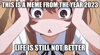
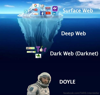
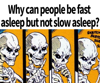
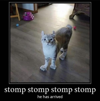
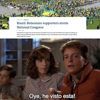
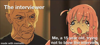
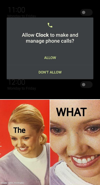
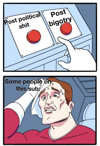
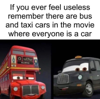
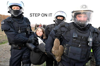


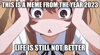
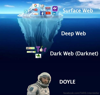
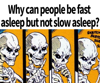
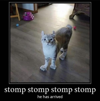
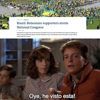
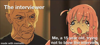
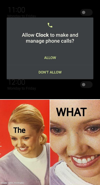
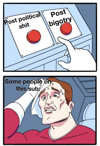
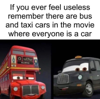
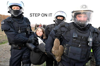

In [ ]:
import ipyplot

# get a list of all images
all_images = [x['image'] for x in dataset]
ipyplot.plot_images(all_images,max_images=10,img_width=100)

### **Ranking Function**
Rank images based on CLIP similarity.

In [ ]:
def compute_similarities(query, images):
    """
    Compute the cosine similarity between a query and a list of images.
    """
    # Obtain the text-image similarity scores
    with torch.no_grad():
        inputs = processor(text=[query],
                        images=images, return_tensors="pt", padding=True).to(device)
        outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image.reshape(-1) # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=-1) # we can take the softmax to get the label probabilities
    return probs

def rank_images_based_on_clip(query, images, k=3):
    """
    Rank images based on CLIP similarity.
    """
    similarities = compute_similarities(query, images)
    # Filter the scores and return indices
    values, indices = similarities.squeeze().topk(k) # Top-k
    return [images[i] for i in indices]


In [ ]:
import time
start = time.time()
rank_images_based_on_clip("a cat", all_images)
end = time.time()
print(f"Time taken to rank {len(all_images)} images: {int(end - start)} seconds")

Time taken to rank 500 images: 6 seconds


### Gradio Interface

In [ ]:
import gradio as gr
from io import BytesIO
from PIL import Image

def interface_function(text_prompt, images=all_images):
    """
    This function takes a text prompt, generates images, ranks them based on CLIP similarity,
    and returns the top-ranked image to display in the Gradio interface.
    """
    # Rank images and select the top-ranked image
    ranked_images = rank_images_based_on_clip(text_prompt, images)
    top_image = ranked_images[0]  # Assuming the first image is the highest ranked

    return top_image

# Create Gradio interface
iface = gr.Interface(fn=interface_function,
                     inputs="textbox",
                     outputs="image",
                     title="Text to Image with CLIP Ranking📊",
                     description="Enter a prompt to generate and rank memes based on CLIP similarity.")

In [ ]:
# UNCOMMENT LINE TO LAUNCH THE INTERFACE
# iface.launch(share=False,debug=True)

### **Linear Probe (Classification): Pokemon Classifier** <img src='https://drive.google.com/uc?id=1mnU4IYgbuKhFc1VXro0Gns7Qe1i5F4AK' width=30px> <img src='https://drive.google.com/uc?id=1zPnwRQYVc7N67suMivJrqrRrxXuruNbg' width=30px>
In this guide, we'll explore how to implement a linear probe classifier using CLIP, a concept we've touched upon in our lectures. A linear probe essentially layers a logistic regression model atop the encodings from a pre-trained model like CLIP. This technique allows us to train a model to distinguish between different classes of images with minimal effort and high accuracy. Today, our focus will be on building a classifier that can distinguish between different types of Pokemons.

Adapted from [here](https://github.com/openai/CLIP)

In [ ]:
%%capture
## load pokemon dataset
from datasets import load_dataset
dataset = load_dataset('zishuod/pokemon-icons')
train = dataset['train']
test = dataset['test']

# huggingface dataset labels are of type ClassLabel which holds information about the labeling method
label_list = test.features[f"label"].names



In [ ]:
# preprocess the images
def clip_preprocess(examples):
    examples['image'] = processor(images=examples["image"], return_tensors='pt')["pixel_values"]
    return examples

# map function needs explicit setting of columns to tensors otherwise it returns a list
train = train.map(clip_preprocess, batched=True)
train.set_format("pt", columns=["image"], output_all_columns=True)
test = test.map(clip_preprocess, batched=True)
test.set_format("pt", columns=["image"], output_all_columns=True)

Map:   0%|          | 0/427 [00:00<?, ? examples/s]

Map:   0%|          | 0/165 [00:00<?, ? examples/s]

In [ ]:
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

def get_features(dataset):
    all_features = []
    all_labels = []
    with torch.no_grad():
        for batch in tqdm(DataLoader(dataset, batch_size=100)):
            features = model.get_image_features(batch["image"].to(device))
            all_features.append(features)
            all_labels.append(batch['label'])

    return torch.cat(all_features).cpu().numpy(), torch.cat(all_labels).cpu().numpy()

# Calculate the image features
train_features, train_labels = get_features(train)
test_features, test_labels = get_features(test)

100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


Now we will visualize the feature embeddings using a powerful dimensionality reduction technique called [T-Sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to perform and visualize t-SNE on the features
def visualize_with_tsne(features, labels):
    # Perform t-SNE dimensionality reduction to reduce the features to 2D
    tsne = TSNE(n_components=2, random_state=0)
    features_2d = tsne.fit_transform(features)

    # Plot the 2D features with labels
    plt.figure(figsize=(10, 8))
    for label in np.unique(labels):
        # Filter features based on the label
        indices = labels == label
        plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=label_list[label])
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, fontsize='small')
    plt.title('Feature visualization with t-SNE')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.show()


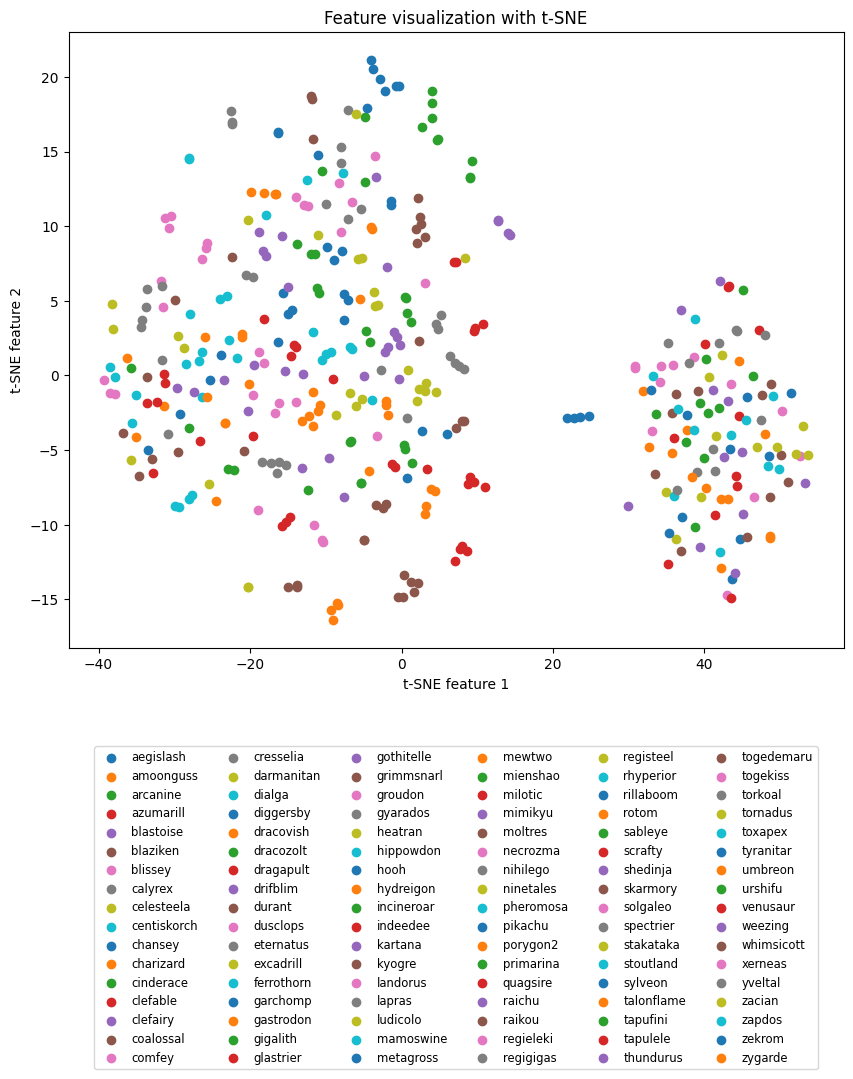

In [ ]:
visualize_with_tsne(train_features, train_labels)

We see that CLIP does not seem to separate the Pokemons well at a zero-shot setting. Let's see whether we can improve performance using linear probe.

In [ ]:
text_inputs = processor(text =[(f"a photo of a {c}") for c in label_list], return_tensors='pt', padding=True).to(device)

# Calculate features
with torch.no_grad():
    text_features = model.get_text_features(**text_inputs)

# Pick the top 5 most similar labels for the image
test_features_pt = torch.tensor(test_features).to(device)
test_features_pt /= test_features_pt.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * test_features_pt @ text_features.T).softmax(dim=-1)
values, indices = similarity.topk(1, dim=-1)
indices.reshape(-1).cpu().numpy()
print(f"Accuracy = {np.mean(indices.reshape(-1).cpu().numpy() == test_labels)*100.:.3f}")

Accuracy = 32.121


As expected, only 1/3 of Pokemons are correctly classified. This is likely due to the specificity of the dataset.

In [ ]:
# Perform logistic regression
classifier = LogisticRegression(random_state=0, C=0.316, max_iter=1000, verbose=1)
classifier.fit(train_features, train_labels)

# Evaluate using the logistic regression classifier
predictions = classifier.predict(test_features)
accuracy = np.mean((test_labels == predictions).astype(float)) * 100.
print(f"Accuracy = {accuracy:.3f}")

Accuracy = 91.515


Indeed, we get significantly better performance - showcasing the effectiveness of linear probe.

## 🌋LLaVA Inference: Unleashing the Power of Multimodal Conversation 🚀

<img src='https://drive.google.com/uc?id=1ORKYGgVS6ffz3x7CIDXIgVxp9ApIgHmQ' width=500px>

Exciting times ahead! 🚀 We're about to create a chatbot 🤖 that's not just any chatbot, but one that can engage in conversations about images using [LLaVA](https://llava-vl.github.io/)🌈,

LLaVA inference code adapted from [here](https://colab.research.google.com/drive/1qsl6cd2c8gGtEW1xV5io7S8NHh-Cp1TV?usp=sharing). ChatBot code adapted from [here](https://colab.research.google.com/github/gradio-app/gradio/blob/main/demo/chatbot_multimodal/run.ipynb)

To ensure our chatbot runs smoothly without compromising on speed or quality, we'll harness the power of [QLoRA](https://huggingface.co/blog/4bit-transformers-bitsandbytes) quantization. This technique is like a magic spell ✨, shrinking the model's size while maintaining its impressive capabilities. With 4-bit precision, the model size shrinks by a factor of 8 from the original 32-float precision with minimal, if any, impact on performance!
😊

In [ ]:
!pip install -q -U transformers==4.41.2
!pip install -q -U bitsandbytes accelerate
!wget -q https://drive.google.com/uc?id=1ppqPIwtZPeFTX6vZxVxG2ZnP26hi6dZU -O avatar.jpeg

**Important Steps Before Proceeding:** 🚨

* Restart Your Runtime: Make sure to restart your runtime after installing packages to refresh your environment.
* Use a GPU Runtime: Ensure your project is running on a GPU-powered runtime.

This code snippet sets up a configuration for model quantization using the [BitsAndBytes library](https://github.com/TimDettmers/bitsandbytes), tailored to optimize model size and computation speed, particularly for deployment scenarios where resources are limited.

- `BitsAndBytesConfig`: This function creates a configuration object for quantizing a neural network model. BitsAndBytes is a library designed to reduce the memory footprint of models and speed up their computation by using lower precision (fewer bits) for storing and processing weights.

- `load_in_4bit`: By setting this parameter to `True`, the configuration specifies that the model weights should be loaded in 4-bit precision. This is a significant reduction from the standard 32-bit floating-point precision, leading to a smaller model size and potentially faster inference times at the cost of a slight reduction in accuracy.

- `bnb_4bit_compute_dtype=torch.float16`: This setting indicates that during computations involving the 4-bit quantized weights, the data type used will be 16-bit floating point (`torch.float16`). This choice strikes a balance between reducing computational load and maintaining sufficient numerical precision for many tasks.

In summary, this configuration is used to prepare a neural network model for quantization with BitsAndBytes, aiming to enhance efficiency by reducing the model's memory usage and accelerating its computations through lower precision operations.

In [ ]:
import torch

## delete CLIP model to free GPU space
try:
  del model
  del processor
  import gc
  gc.collect()
  torch.cuda.empty_cache()
except:
  pass

In [ ]:
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import pipeline

# initialize image-to-text pipeline with LLaVA
# model_id = "llava-hf/llava-1.5-7b-hf"
model_id="Intel/llava-gemma-2b"
if '2b' in model_id:
  quantization_config = None
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config, 'device_map':'auto'})

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
max_new_tokens = 200 # maximum number of new tokens to generate

def post_process(generated_text):
  """
  This function is used to post process the generated text.
  """
  if '2b' in model_id:
    return generated_text.split("model\n")[-1].strip()
  return generated_text.split("ASSISTANT:")[-1].strip()

LLMs, follow specific structures influenced by their fine-tuning approaches. Since LLaVA is developed upon the foundations of [Vicuna 1.5](https://github.com/lm-sys/FastChat/blob/main/docs/vicuna_weights_version.md), it requires adherence to a certain prompt format that matches its finetuning for optimal performance.


In [ ]:
## prompt for original 7b LLaVA
prompt = "USER: <image>\n{}\nASSISTANT:"
## for gemma this is the chat template
prompt = "<start_of_turn>user\n <image>\n{}<end_of_turn>\n<start_of_turn>model"

We are now ready to run the `gradio` code for our chatbot🤖🤖

In [ ]:
import gradio as gr
import os
import time
from PIL import Image

current_image = None # holds the last uploaded image

def add_text(history, text):
    history = history + [(text, None)]
    return history, gr.Textbox(value="", interactive=False)


def add_file(history, file):
    global current_image
    current_image = Image.open(file.name)
    history = history + [((file.name,), None)]
    return history


def bot(history):
    global current_image
    if not current_image:
        response = "Please upload an image first."
        return history, gr.Textbox(value=response, interactive=False)
    if isinstance(history[-1][0], str):
        response = post_process(pipe(images=current_image,prompt=prompt.format((history[-1][0])), max_new_tokens=max_new_tokens)[0]["generated_text"])
    else:
        response = "Thank you for uploading the image. How can I help you today?"
    history[-1][1] = ""
    for character in response:
        history[-1][1] += character
        time.sleep(0.05)

        yield history


with gr.Blocks() as demo:
    chatbot = gr.Chatbot(
        [],
        elem_id="chatbot",
        bubble_full_width=False,
        avatar_images=(None, (os.path.join(os.path.abspath(''), "avatar.jpeg"))),
    )

    with gr.Row():
        txt = gr.Textbox(
            scale=4,
            show_label=False,
            placeholder="Enter text and press enter, or upload an image",
            container=False,
        )
        btn = gr.UploadButton("📁", file_types=["image"])

    txt_msg = txt.submit(add_text, [chatbot, txt], [chatbot, txt], queue=False).then(
        bot, chatbot, chatbot, api_name="bot_response"
    )
    txt_msg.then(lambda: gr.Textbox(interactive=True), None, [txt], queue=False)
    file_msg = btn.upload(add_file, [chatbot, btn], [chatbot], queue=False).then(
        bot, chatbot, chatbot
    )

    chatbot.change(None, None, None)


demo.queue()
if __name__ == "__main__":
    demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.47.1, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://5a7d301c634f8c630d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://5a7d301c634f8c630d.gradio.live
